In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

In [2]:
# Reading the matrix containing all the 13 features; the columns follow the same order from the EXPREssO dataset
path1 = '/home/cristiano/Documentos/ESPREssO/matrix_X.txt'
path2 = '/home/cristiano/Documentos/ESPREssO/matrix_Y.txt'
matrix_X = np.loadtxt(path1, usecols=range(13))
matrix_Y = np.loadtxt(path2, usecols=range(4))

# We are going to build a X-features FIFM matrix, generated by NF (col0), NM (col1) and FoC (col5).
x_FIFM = matrix_X[:,[0,1,5]].copy()
y_FIFM = matrix_Y[:,[2]].copy()

### Now we are going to generate classificator array, where <br>
#### 1 - very low, 2 - low, 3 -med, 4 - high, 5 - very high

In [3]:
y_class = y_FIFM.copy()
for i in range(len(y_FIFM)):
    if( y_class[i] < 10 ):
        y_class[i] = 1
    else:
        if( y_class[i] >= 10 and y_class[i] < 25  ):
            y_class[i] = 2
        else:
            if( y_class[i] >= 25 and y_class[i] < 40 ):
                y_class[i] = 3
            else:
                if( y_class[i] >= 40 and y_class[i] < 55  ):
                    y_class[i] = 4
                else:
                    if( y_class[i] >= 55 ):
                        y_class[i] = 5
        

**É importante observar que, como nos dados da classe y_class não teve uma instância sequer classificada como very low, então o modelo só vai usar 4 classes: de low à very high.** <br>
Para ver isso, basta descomentar a classe abaixo:

In [4]:
 # y_class

# Spliting in TRAIN and TEST

## It gets only 30 first instances

In [5]:
#x_train, x_test, y_train, y_test = x_FIFM[:20], x_FIFM[20:30], y_class[:20], y_class[20:30]

## It gets ALL the 37 instances

In [6]:
x_train, x_test, y_train, y_test = x_FIFM[:27], x_FIFM[27:], y_class[:27], y_class[27:]

## Ploting chart <br>
**read more in:** https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

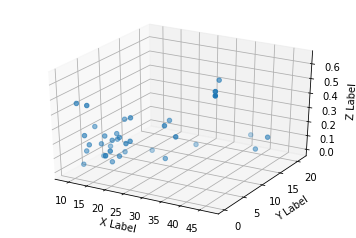

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = x_FIFM[:,[0]]
ys = x_FIFM[:,[1]]
zs = x_FIFM[:,[2]]
ax.scatter(xs, ys, zs, 'b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Logistic Regression <br>
see also: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [8]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1, random_state=42)
log_reg.fit(x_test, y_test.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Below, predict and predict_proba are random examples

In [9]:
log_reg.predict([[13, 4, 7]])

array([3.])

In [10]:
log_reg.predict_proba([[13, 4, 7]])

array([[2.61426090e-01, 5.81618467e-01, 1.56742430e-01, 2.13012695e-04]])

Returns the mean accuracy on the given test data and labels.<br>

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [11]:
#log_reg.score(y_test, log_reg.predict(x_test))

In [12]:
confusion_matrix(y_test, log_reg.predict(x_test))

array([[5, 0, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [13]:
y_test.ravel()

array([5., 2., 3., 3., 4., 2., 3., 2., 2., 2.])

In [14]:
log_reg.predict(x_test)

array([5., 2., 3., 2., 4., 2., 3., 2., 2., 2.])

## metrics used: <br>
here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**Precision:** http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

In [15]:
# This parameter is required for multiclass/multilabel targets. 
# If None, the scores for each class are returned.
precision_score(y_test, log_reg.predict(x_test),average=None)

array([0.83333333, 1.        , 1.        , 1.        ])

In [16]:
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision_score(y_test, log_reg.predict(x_test),average="micro")

0.9

In [17]:
# Calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
precision_score(y_test, log_reg.predict(x_test),average="macro")

0.9583333333333334

In [18]:
# Calculate metrics for each label, and find their average, weighted by support 
# (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; 
# it can result in an F-score that is not between precision and recall.
precision_score(y_test, log_reg.predict(x_test), average="weighted")

0.9166666666666667

**Recall:** http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [19]:
recall_score(y_test, log_reg.predict(x_test),average=None)

array([1.        , 0.66666667, 1.        , 1.        ])

In [20]:
recall_score(y_test, log_reg.predict(x_test),average="micro")

0.9

In [21]:
recall_score(y_test, log_reg.predict(x_test),average="macro")

0.9166666666666666

In [22]:
recall_score(y_test, log_reg.predict(x_test),average="weighted")

0.9

**f1_score():** http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [23]:
f1_score(y_test, log_reg.predict(x_test),average=None)

array([0.90909091, 0.8       , 1.        , 1.        ])

In [24]:
f1_score(y_test, log_reg.predict(x_test),average="micro")

0.9

In [25]:
f1_score(y_test, log_reg.predict(x_test),average="macro")

0.9272727272727272

In [26]:
f1_score(y_test, log_reg.predict(x_test),average="weighted")

0.8945454545454545

## Matthews correlation coefficient (MCC) <br>
see also: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef

The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient. <br>
It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.

In [27]:
matthews_corrcoef(y_test, log_reg.predict(x_test))

0.8534918135881966

In [28]:
np.sqrt(mean_squared_error(y_test, log_reg.predict(x_test)))

0.31622776601683794

# SGD Classificator <br>
see also: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [29]:
clf = SGDClassifier(shuffle=True, loss="hinge", penalty="l2", max_iter=100, random_state=42)
clf.fit(x_train, y_train.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [30]:
matthews_corrcoef(y_test, clf.predict(x_test))

0.34299717028501764

In [31]:
confusion_matrix(y_test, clf.predict(x_test))

array([[5, 0, 0, 0],
       [3, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [32]:
# using GRID PARAMETER is commented because there is an error: 
# k-flod error because one of the classes has just one element

param_grid = [{'alpha':[0.0001, 0.5, 1, 1.5], 'max_iter':[50,100,150,200], 'eta0':[1, 0.1, 0.01, 0.001, 0.0001]}] # Defining a set of values to check
sgd_clf = SGDClassifier(shuffle=True, loss="hinge", penalty="l2", random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())
grid_search.best_params_

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(clf, X_train_scaled, y_train.ravel(), cv=3, scoring="accuracy")

In [33]:
matthews_corrcoef(y_test, clf.predict(x_test))

0.34299717028501764

In [34]:
np.sqrt(mean_squared_error(y_test, clf.predict(x_test)))

0.6324555320336759